In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import gdown

from sklearn.decomposition import IncrementalPCA
from anndata.dev.multi_files import AnnDataSet

In [ ]:
gdown.download(url="https://drive.google.com/uc?id=1X5N9rOaIqiGxZRyr1fyZ6NpDPeATXoaC", 
               output="pbmc_seurat_v4.h5ad", quiet=False)
gdown.download(url="https://drive.google.com/uc?id=1JgaXNwNeoEqX7zJL-jJD3cfXDGurMrq9", 
               output="covid_cite.h5ad", quiet=False)

In [2]:
covid = sc.read('covid_cite.h5ad')

In [3]:
covid

AnnData object with n_obs × n_vars = 57669 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.4', 'seurat_clusters', 'set', 'Resp', 'disease', 'subj_code', 'covidpt_orhealth', 'mito', 'ncount', 'nfeat', 'bust_21', 'og_clust', 'severmod_other', 'og_clusts', 'nCount_ADT', 'nFeature_ADT', 'UMAP1', 'UMAP2', 'final_clust', 'final_clust_v2', 'new_pt_id', 'Resp_og', 'final_clust_withnum', 'final_clust_review', 'Age', 'Gender', 'Gender_num'
    obsm: 'pro_exp'

In [4]:
pbmc = sc.read('pbmc_seurat_v4.h5ad')

In [5]:
pbmc

AnnData object with n_obs × n_vars = 161764 × 20729
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'X_index'
    obsm: 'protein_counts'

In [27]:
dataset = AnnDataSet([covid, pbmc], join_vars='inner', join_obs=None)

In [28]:
# inner join for obs
# obs are in the underlying anndata objects
# and accessed from there in views
dataset

AnnDataSet object with n_obs × n_vars = 219433 × 20729
  constructed from 2 AnnData objects
    view of obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT'

In [30]:
dataset.obs.head()

""
AAACCCACACCAGCGT-1
AAACCCACATCTCAAG-1
AAACGAAAGACCTGGA-1
AAACGCTCAGTGGGTA-1
AAACGCTGTAGCTTGT-1


In [32]:
dataset = AnnDataSet([covid, pbmc], join_vars='inner', join_obs='inner') # join_obs='inner' by default

In [33]:
# inner join of obs
# obs are in the dataset object
# and accessed from there in views
dataset.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT
AAACCCACACCAGCGT-1,SeuratProject,45410.0,5428,473.0,37
AAACCCACATCTCAAG-1,SeuratProject,1839.0,1032,97.0,23
AAACGAAAGACCTGGA-1,SeuratProject,10759.0,1855,262.0,34
AAACGCTCAGTGGGTA-1,SeuratProject,1114.0,609,360.0,38
AAACGCTGTAGCTTGT-1,SeuratProject,5966.0,1850,611.0,37


In [35]:
dataset = AnnDataSet([covid, pbmc], join_vars='inner', join_obs='outer')

In [36]:
# outer join of obs
# obs are in the dataset object
# and accessed from there in views
dataset.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.4,seurat_clusters,set,Resp,disease,subj_code,covidpt_orhealth,...,lane,donor,time,celltype.l1,celltype.l2,celltype.l3,Phase,nCount_SCT,nFeature_SCT,X_index
AAACCCACACCAGCGT-1,SeuratProject,45410.0,5428,15,15,set1,severe,COVID-19,nCOV3EUHM,nCOV3EUHM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCCACATCTCAAG-1,SeuratProject,1839.0,1032,12,12,set1,severe,COVID-19,nCOV3EUHM,nCOV3EUHM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACGAAAGACCTGGA-1,SeuratProject,10759.0,1855,13,13,set1,severe,COVID-19,nCOV3EUHM,nCOV3EUHM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACGCTCAGTGGGTA-1,SeuratProject,1114.0,609,12,12,set1,severe,COVID-19,nCOV3EUHM,nCOV3EUHM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACGCTGTAGCTTGT-1,SeuratProject,5966.0,1850,7,7,set1,severe,COVID-19,nCOV3EUHM,nCOV3EUHM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# join_obsm='inner' to join obsms, no shared obsm in this case, the option set to have the empty obsm in dataset to use later 
dataset = AnnDataSet([covid, pbmc], join_vars='inner', join_obs='outer', join_obsm='inner')

In [40]:
# a simple example of usage

In [9]:
dataset.obs['orig.ident'].loc[covid.obs_names] = covid.obs['set']

In [ ]:
ipca = IncrementalPCA(n_components=50)

for batch, idx in dataset.iterate_axis(6000):
    ipca.partial_fit(batch.X.toarray())

In [8]:
dataset.obsm['X_pca'] = np.empty((dataset.shape[0], 50), dtype='float64')

In [9]:
for batch, idx in dataset.iterate_axis(6000):
    dataset.obsm['X_pca'][idx] = ipca.transform(batch.X.toarray())

In [45]:
dataset.obs['dataset'] = pd.Series(dtype='O')
dataset.obs['dataset'].loc[covid.obs_names] = 'covid'
dataset.obs['dataset'].loc[pbmc.obs_names] = 'pbmc'

In [46]:
adata = dataset.to_adata()

In [47]:
adata

AnnData object with n_obs × n_vars = 219433 × 20729
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.4', 'seurat_clusters', 'set', 'Resp', 'disease', 'subj_code', 'covidpt_orhealth', 'mito', 'ncount', 'nfeat', 'bust_21', 'og_clust', 'severmod_other', 'og_clusts', 'nCount_ADT', 'nFeature_ADT', 'UMAP1', 'UMAP2', 'final_clust', 'final_clust_v2', 'new_pt_id', 'Resp_og', 'final_clust_withnum', 'final_clust_review', 'Age', 'Gender', 'Gender_num', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'X_index', 'dataset'
    obsm: 'X_pca'

In [48]:
# no X here
print(adata.X)

None


In [49]:
sc.pp.neighbors(adata)

In [50]:
sc.tl.umap(adata)

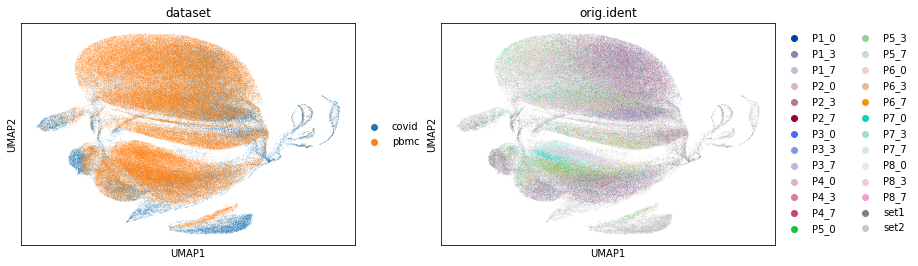

In [53]:
sc.pl.umap(adata, color=['dataset', 'orig.ident'])

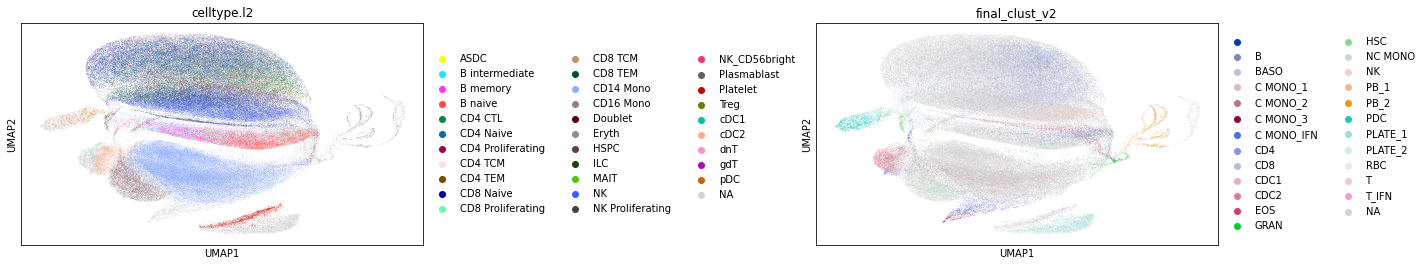

In [52]:
sc.pl.umap(adata, color=['celltype.l2', 'final_clust_v2'], wspace=0.8)

In [ ]:
# some benchmarks

In [54]:
%%timeit
batch = dataset[np.random.choice(dataset.shape[0], 200, replace=False)]
X = batch.X
X_pca = batch.obsm['X_pca']
annot = batch.obs['orig.ident']

9.64 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# compare runtime for a single anndata subsetting

In [9]:
ds_pbmc = AnnDataSet([pbmc])

In [20]:
ds_pbmc

AnnDataSet object with n_obs × n_vars = 161764 × 20729
  constructed from 1 AnnData objects
    view of obsm: 'protein_counts'
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'X_index'

In [10]:
ds_covid = AnnDataSet([covid])

In [21]:
ds_covid

AnnDataSet object with n_obs × n_vars = 57669 × 33538
  constructed from 1 AnnData objects
    view of obsm: 'pro_exp'
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.4', 'seurat_clusters', 'set', 'Resp', 'disease', 'subj_code', 'covidpt_orhealth', 'mito', 'ncount', 'nfeat', 'bust_21', 'og_clust', 'severmod_other', 'og_clusts', 'nCount_ADT', 'nFeature_ADT', 'UMAP1', 'UMAP2', 'final_clust', 'final_clust_v2', 'new_pt_id', 'Resp_og', 'final_clust_withnum', 'final_clust_review', 'Age', 'Gender', 'Gender_num'

In [18]:
%%timeit
# AnnDataSet pbmc
batch = ds_pbmc[np.random.choice(ds_pbmc.shape[0], 200, replace=False)]
X = batch.X
proteins = batch.obsm['protein_counts']
annot = batch.obs['celltype.l2']

4.83 ms ± 42 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit
# AnnData pbmc
batch = pbmc[np.random.choice(pbmc.shape[0], 200, replace=False)]
X = batch.X
proteins = batch.obsm['protein_counts']
annot = batch.obs['celltype.l2']

8.06 ms ± 52.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%%timeit
# AnnDataSet covid
batch = ds_covid[np.random.choice(ds_covid.shape[0], 200, replace=False)]
X = batch.X
proteins = batch.obsm['pro_exp']
annot = batch.obs['final_clust']

2.52 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%%timeit
# AnnData covid
batch = covid[np.random.choice(covid.shape[0], 200, replace=False)]
X = batch.X
proteins = batch.obsm['pro_exp']
annot = batch.obs['final_clust']

9.27 ms ± 27.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# runtime the backed adatas

In [45]:
pbmc_b = sc.read('pbmc_seurat_v4.h5ad', backed='r')
covid_b = sc.read('covid_cite.h5ad', backed='r')

In [48]:
dataset = AnnDataSet([pbmc_b, covid_b], join_vars='inner', join_obs=None, join_obsm='inner')

In [49]:
dataset

AnnDataSet object with n_obs × n_vars = 219433 × 20729
  constructed from 2 AnnData objects
    view of obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident'

In [64]:
%%timeit
batch = dataset[np.random.choice(dataset.shape[0], 200, replace=False)]
X = batch.X
annot = batch.obs['orig.ident']

261 ms ± 4.34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# slow here because a SparseDataset selection is slow, it is much better for a normal h5py Dataset

In [65]:
X = pbmc_b.X

In [66]:
%%timeit
batch = X[np.random.choice(pbmc.shape[0], 200, replace=False)]

271 ms ± 7.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# compare runtime for a single backed anndata subsetting

In [67]:
ds_pbmc_b = AnnDataSet([pbmc_b])

In [73]:
%%timeit
# AnnDataSet pbmc
batch = ds_pbmc_b[np.random.choice(ds_pbmc_b.shape[0], 200, replace=False)]
X = batch.X
proteins = batch.obsm['protein_counts']
annot = batch.obs['celltype.l2']

268 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [74]:
%%timeit
# AnnData pbmc
batch = pbmc_b[np.random.choice(pbmc_b.shape[0], 200, replace=False)]
X = batch.X
proteins = batch.obsm['protein_counts']
annot = batch.obs['celltype.l2']

279 ms ± 3.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
ds_covid_b = AnnDataSet([covid_b])

In [80]:
%%timeit
# AnnDataSet covid
batch = ds_covid_b[np.random.choice(ds_covid_b.shape[0], 200, replace=False)]
X = batch.X
proteins = batch.obsm['pro_exp']
annot = batch.obs['final_clust']

205 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [78]:
%%timeit
# AnnData covid
batch = covid_b[np.random.choice(covid_b.shape[0], 200, replace=False)]
X = batch.X
proteins = batch.obsm['pro_exp']
annot = batch.obs['final_clust']

214 ms ± 3.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
